In [24]:
import pandas as pd
data = pd.read_csv('17zpallagi.csv')

In [53]:
data.columns

Index(['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2',
       'MARS4', 'ELF', 'CPREP',
       ...
       'N85300', 'A85300', 'N11901', 'A11901', 'N11900', 'A11900', 'N11902',
       'A11902', 'N12000', 'A12000'],
      dtype='object', length=153)

In [56]:
d = pd.DataFrame()
d = data[['STATE', 'zipcode', 'agi_stub']]

In [68]:
d.isnull().sum()

STATE       0
zipcode     0
agi_stub    0
dtype: int64

### we can see the data doesn't have null values

In [76]:
import matplotlib.pyplot as plt
state_count = d.STATE.value_counts().to_frame().reset_index()

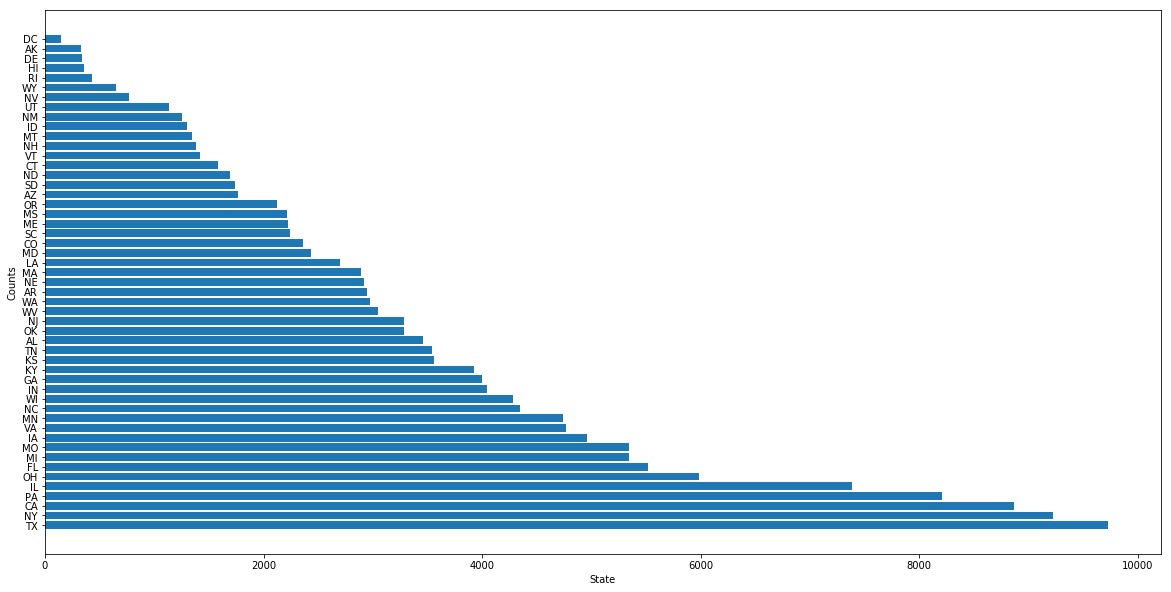

In [109]:
state_count.columns = ['State', 'Count']
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.barh(state_count.State, state_count.Count, align = 'center')
plt.xlabel('Counts')
plt.ylabel('State')
plt.show()

### Most of the data we have is of TX, but we will only take records of Illinois.

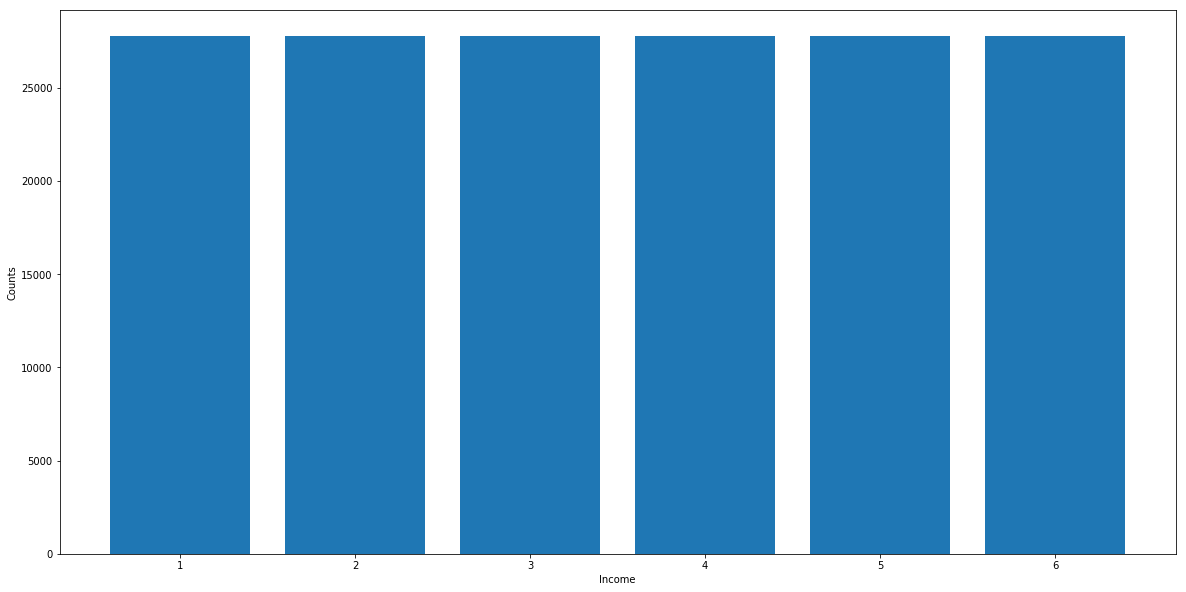

In [124]:
income_count = d.agi_stub.value_counts().to_frame().reset_index()
income_count.columns = ['agi_stub', 'Count']
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111)
plt.bar(income_count.agi_stub, income_count.Count, align = 'center')
plt.ylabel('Counts')
plt.xlabel('Income')
plt.show()

### this looks like quite a balanced attribute 

In [96]:
d = d.rename(columns = {'zipcode':'postal_code'})
d.columns

Index(['STATE', 'postal_code', 'agi_stub'], dtype='object')

In [97]:
business = pd.read_csv('Business_in_Illinois.csv')
business.columns

Index(['Unnamed: 0', 'address', 'attributes', 'business_id', 'categories',
       'city', 'hours', 'is_open', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'stars', 'state',
       'BusinessAcceptsCreditCards', 'RestaurantsAttire',
       'RestaurantsPriceRange2', 'Caters', 'RestaurantsReservations', 'HasTV',
       'RestaurantsGoodForGroups', 'Alcohol', 'RestaurantsDelivery',
       'GoodForKids', 'RestaurantsTakeOut', 'OutdoorSeating', 'NoiseLevel',
       'BikeParking', 'WiFi', 'Restaurants', 'Food', 'Fast Food',
       'American (Traditional)', 'Nightlife', 'Sandwiches', 'Bars', 'Pizza',
       'Coffee & Tea', 'Burgers', 'Mexican', 'Chinese', 'Grocery', 'Bakeries',
       'American (New)', 'Breakfast & Brunch', 'Specialty Food',
       'Ice Cream & Frozen Yogurt', 'Shopping', 'Event Planning & Services'],
      dtype='object')

In [102]:
inc_bus = pd.merge(business, d[['postal_code', 'agi_stub']], on = 'postal_code', how = 'left').drop(columns ='Unnamed: 0')

In [103]:
inc_bus.to_csv('Secondary_data.csv')

In [104]:
inc_bus.shape[0]

3368

In [105]:
inc_bus

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,...,Chinese,Grocery,Bakeries,American (New),Breakfast & Brunch,Specialty Food,Ice Cream & Frozen Yogurt,Shopping,Event Planning & Services,agi_stub
0,713 W Marketview Dr,"{'WiFi': ""u'no'"", 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",Champaign,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,40.137270,-88.256043,ChinaTown Buffet,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,713 W Marketview Dr,"{'WiFi': ""u'no'"", 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",Champaign,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,40.137270,-88.256043,ChinaTown Buffet,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,713 W Marketview Dr,"{'WiFi': ""u'no'"", 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",Champaign,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,40.137270,-88.256043,ChinaTown Buffet,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,713 W Marketview Dr,"{'WiFi': ""u'no'"", 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",Champaign,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,40.137270,-88.256043,ChinaTown Buffet,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,713 W Marketview Dr,"{'WiFi': ""u'no'"", 'RestaurantsReservations': '...",mofOjB6flg-eAWOFbOkHfQ,"Sushi Bars, Buffets, Restaurants, Chinese",Champaign,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",1.0,40.137270,-88.256043,ChinaTown Buffet,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,2 E Main St,"{'RestaurantsGoodForGroups': 'True', 'Business...",F1qPjasn0R6-j8sa6iYNmA,"American (Traditional), Nightlife, Bars, Resta...",Champaign,"{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",1.0,40.117863,-88.243301,Guido's Bar & Grill,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3364,2 E Main St,"{'RestaurantsGoodForGroups': 'True', 'Business...",F1qPjasn0R6-j8sa6iYNmA,"American (Traditional), Nightlife, Bars, Resta...",Champaign,"{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",1.0,40.117863,-88.243301,Guido's Bar & Grill,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3365,2 E Main St,"{'RestaurantsGoodForGroups': 'True', 'Business...",F1qPjasn0R6-j8sa6iYNmA,"American (Traditional), Nightlife, Bars, Resta...",Champaign,"{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",1.0,40.117863,-88.243301,Guido's Bar & Grill,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3366,2 E Main St,"{'RestaurantsGoodForGroups': 'True', 'Business...",F1qPjasn0R6-j8sa6iYNmA,"American (Traditional), Nightlife, Bars, Resta...",Champaign,"{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...",1.0,40.117863,-88.243301,Guido's Bar & Grill,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
